In [54]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

%matplotlib inline

In [55]:
masses = list(np.linspace(500,15000,20)) + [20000,50000,100000]
# [20000,50000,100000]

In [59]:
masses = list(np.array([   500.        ,   1263.15789474,   2026.31578947,   2789.47368421,
         3552.63157895,   4315.78947368,   5078.94736842,   
         6605.26315789,   7368.42105263,   8131.57894737,   8894.73684211,
         9657.89473684,  10421.05263158,  11184.21052632,  
        12710.52631579,  13473.68421053,  14236.84210526,  15000.        ])) + [20000,50000,100000]


In [58]:
dp_frac = []
for mass in masses:
    with open ("/group/hepheno/smsharma/Dark-Showers/MG5_aMC_v2_5_6_patch_int_signal_sig_tchannel_"+str(mass) + "_0/bin/sig_tchannel/HTML/run_01/results.html", "r") as myfile:
        data=myfile.read()
        
    soup = BeautifulSoup(data) # Parse the HTML as a string
    
    table = soup.find_all('table')[0] # Grab the first table
    
    dp_sum = 0.
    rest_sum = 0.
    
    for row in table.find_all('tr'):
        column_marker = 0
        columns = row.find_all('td')
        for icolumn, column in enumerate(columns):
            if columns[icolumn-1].get_text() == 'P1 sum':
                dp_sum += float(column.get_text())
            if columns[icolumn-1].get_text() == 'P2 sum':
                rest_sum += float(column.get_text())
            if columns[icolumn-1].get_text() == 'P3 sum':
                rest_sum += float(column.get_text())
            column_marker += 1
    print dp_sum/(dp_sum+rest_sum)
    dp_frac.append(dp_sum/(dp_sum+rest_sum))

0.351304548807
0.668158935591
0.784225976189
0.824161673559
0.834505709328
0.838103638022
0.835394597743
0.831546508102
0.832775660691
0.833888000796
0.829027035458
0.83122915215
0.830551522614
0.830105128079
0.827416191367
0.829127398504
0.829184179061
0.828399475859
0.827079168754
0.829023623114
0.827826781289


In [61]:
fs_labels = 26
fs_ticks = 25
fs_text = 23
fs_legend = 22

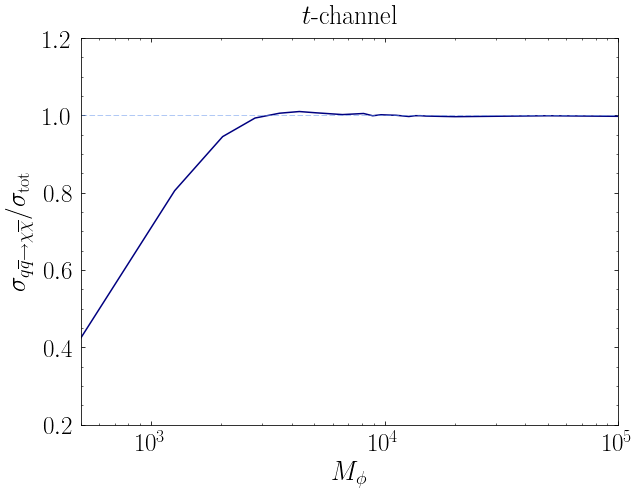

In [72]:
fig=plt.figure(figsize=(9,7))
plot_colorsss=['cornflowerblue','mediumseagreen', 'firebrick','indigo','violet','maroon','darkgrey','lightpink','black','forestgreen','cornflowerblue', 'salmon','violet','goldenrod','maroon','darkgrey','lightpink']

lw = 2.5


plt.plot(masses, np.array(dp_frac)*1/0.83, color = 'navy')
plt.xscale("log")
plt.xlabel("$M_\phi$",fontsize=fs_labels)
plt.ylabel("$\sigma_{q \overline q\\rightarrow \chi\overline\chi}/\sigma_\mathrm{tot}$",fontsize=fs_labels)
plt.ylim(0.2,1.2)
plt.xlim(min(masses), max(masses))

leg = plt.legend(bbox_to_anchor=(0, 0, 0.97, 0.95),
           fontsize=22, ncol=1,frameon=False,
           handletextpad=.5,
           borderaxespad=0.,title="$M_\phi$")
plt.tick_params(axis='both', which='major', labelsize=fs_ticks)

title = "$t$-channel"
plt.title(title, fontsize=fs_labels)
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.02])
plt.tight_layout()

plt.axhline(1.,ls='--',lw=0.5)

plt.savefig("CxnDPvsRest.pdf")